In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/BIKE DETAILS.csv')

#Q1 What is the range of selling prices in the dataset?


In [3]:
df.selling_price.max()
df.selling_price.min()
selling_range=[df.selling_price.max(),df.selling_price.min()]
print(f'the selling price range is between {selling_range}')

the selling price range is between [760000, 5000]


In [4]:
#Q2 What is the median selling price for bikes in the dataset
df.selling_price.median()

45000.0

In [5]:
#Q3What is the most common seller type?
display(df.seller_type.value_counts())
df.seller_type.mode()

,count
seller_type,
Individual,1055
Dealer,6


,seller_type
0,Individual


In [6]:
 #Q4How many bikes have driven more than 50,000 kilometers?
df[df['km_driven']>50000]['km_driven'].count()

np.int64(170)

In [7]:
#Q5 What is the average km_driven value for each ownership typeD
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [8]:
#Q What proportion of bikes are from the year 2015 or older?
df.columns
df[df.year<2015]['year'].count()

np.int64(501)

In [9]:
#QWhat is the trend of missing values across the datasetD
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [10]:
#q What is the total number of bikes listed by each seller typeD
df.seller_type.value_counts()


,count
seller_type,
Individual,1055
Dealer,6


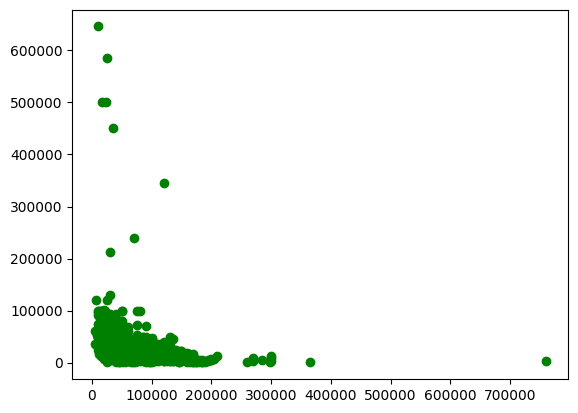

In [11]:
#8;B What is the relationship between selling_price and km_driven for first-owner bikesD
first_owner_df=df[df['owner']=='1st owner']
plt.scatter(first_owner_df['selling_price'],first_owner_df['km_driven'],color='green')
plt.xlabel='selling_price'


{'whiskers': [<matplotlib.lines.Line2D at 0x797595473b50>,
 'caps': [<matplotlib.lines.Line2D at 0x797595478d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79759574acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x79759547a350>],
 'fliers': [<matplotlib.lines.Line2D at 0x79759547ac90>],
 'means': []}

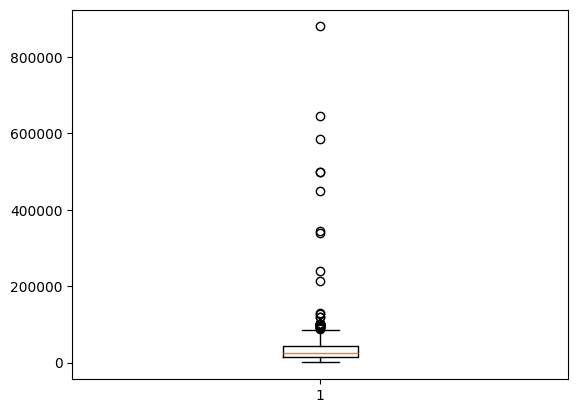

In [12]:
#qQ Identify and remove outliers in the km_driven column using the IQR methodB
display(plt.boxplot(df['km_driven']))
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7975932c81d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7975932cb890>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7975932ca090>],
 'medians': [<matplotlib.lines.Line2D at 0x7975932d8cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7975932d9690>],
 'means': []}

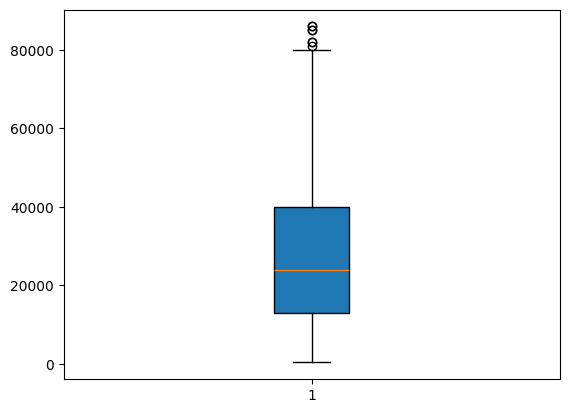

In [13]:
display(plt.boxplot(df_cleaned['km_driven'],patch_artist=True))


In [14]:
#8%B Perform a bivariate analysis to visualize the relationship between year and selling_priceB
import plotly.express as px
px.scatter(df, x = 'year', y = 'selling_price', color = 'owner')


In [15]:
#What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)D
df['year_dec']=2025-df['year']
df.year_dec
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,year_dec
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,15
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,16


In [26]:
#8 B Which bike names are priced significantly above the average price for their manufacturing yearD


In [51]:
df['avg_price']=df['year'].map(df.groupby(['year'])['selling_price'].mean())
#significantly 30% high than avg price
aa=df[df['selling_price']>1.3*df['avg_price']]
aa[['name','year','selling_price','avg_price']]


,name,year,selling_price,avg_price
0,Royal Enfield Classic 350,2019,175000,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
18,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
...,...,...,...,...
981,Royal Enfield Thunder 350,2013,105000,51136.986301
983,Royal Enfield Classic 350,2015,100000,56500.000000
984,Royal Enfield Classic 500,2014,95000,48668.131868
985,Royal Enfield Classic 500,2011,90000,35655.721311


,selling_price,year,km_driven,ex_showroom_price,year_dec,avg_price
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.501140
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,0.802547
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,-0.309402
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.146598
year_dec,-0.402188,-1.000000,0.288675,-0.126378,1.000000,-0.802547
avg_price,0.501140,0.802547,-0.309402,0.146598,-0.802547,1.000000


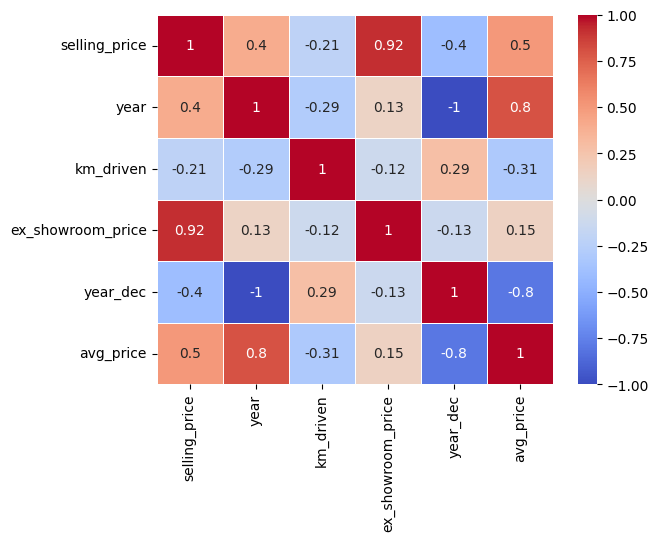

In [53]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap = "coolwarm", linewidth = 0.5)
corr